In [ ]:
第九次作业

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 读取数据集
file_path = 'C:/Users/86189/Desktop/bike.csv'
bike_data = pd.read_csv(file_path)

# 剔除id列
bike_data.drop('id', axis=1, inplace=True)

# 筛选出上海市的数据
bike_data_shanghai = bike_data[bike_data['city'] == 1].copy()  # 使用.copy()避免SettingWithCopyWarning
bike_data_shanghai.drop('city', axis=1, inplace=True)

# 将hour列简化为白天和夜晚
bike_data_shanghai['hour'] = bike_data_shanghai['hour'].apply(lambda x: 1 if 6 <= x <= 18 else 0)

# 提取y列并转换为numpy列向量，同时从DataFrame中删除y列
y = bike_data_shanghai.pop('y').values.reshape(-1, 1)  # 使用pop()避免SettingWithCopyWarning

# 将DataFrame转换为Numpy数组
data_array = bike_data_shanghai.values

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data_array, y, test_size=0.2, random_state=42)

# 归一化
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

# 构建线性回归模型并训练
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# 使用测试集评估模型
y_pred_scaled = model.predict(X_test_scaled)

# 反归一化预测结果和实际结果，以便计算RMSE
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test_scaled)

# 计算RMSE
rmse = mean_squared_error(y_true, y_pred, squared=False)
rmse


E:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


31.56847863511329

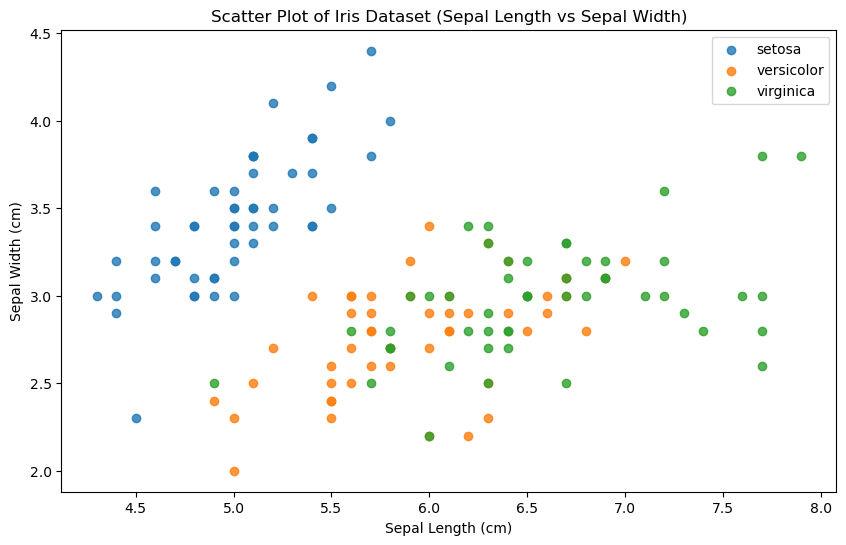

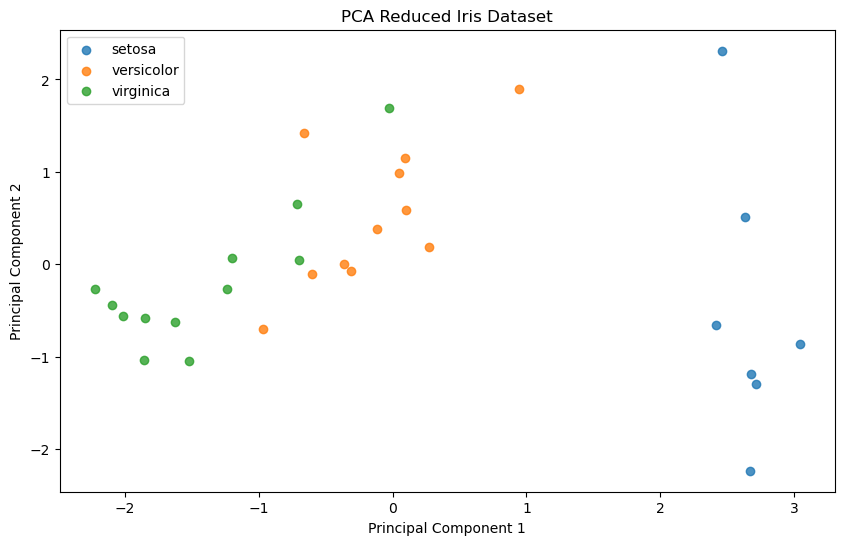

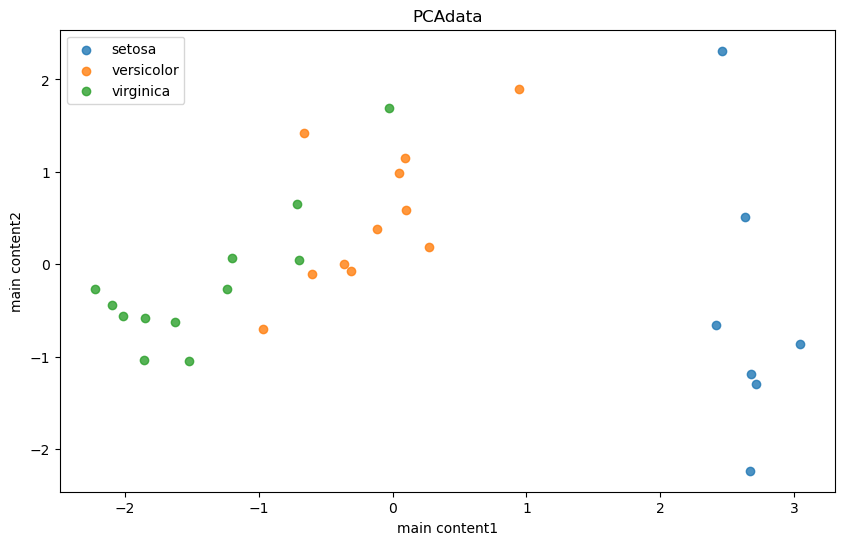

0.9333333333333333

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 重新绘制散点图和PCA降维后的结果图，并调整表头文字

# 绘制散点图（只使用前两个特征，即花萼长度和花萼宽度）
plt.figure(figsize=(10, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], alpha=0.8, label=target_name)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.title('Scatter Plot of Iris Dataset (Sepal Length vs Sepal Width)')
plt.show()

# 可视化PCA降维后的结果
plt.figure(figsize=(10, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], alpha=0.8, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Reduced Iris Dataset')
plt.show()


# 使用PCA进行降维
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 可视化PCA降维后的结果
plt.figure(figsize=(10, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], alpha=0.8, label=target_name)
plt.xlabel('main content1')
plt.ylabel('main content2')
plt.legend()
plt.title('PCAdata')
plt.show()

# 以K=3训练分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

# 在测试集上进行测试
y_pred = knn.predict(X_test_pca)

# 输出分类准确率
accuracy = accuracy_score(y_test, y_pred)
accuracy
